**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [287]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.metrics
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [317]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.K = n_neighbors
        self.alg = algorithm

    def fit(self, X, y):
        self.size = len(y)
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)
        self.classes_num = len(np.unique(y))
        if self.alg == 'kd_tree':
            self.tree = KDTree(X)

    def predict(self, X):
        size_pr = X.shape[0]
        y_pr = np.zeros([size_pr])
        if self.alg == 'brute':
            dist_matrix = sklearn.metrics.pairwise_distances(X,
                                                             self.X_train)
            nei_position = np.argpartition(dist_matrix,
                                           (range(self.K)), axis=1)
            nei_position = nei_position[:, :self.K]
        if self.alg == 'kd_tree':
            nei_position = self.tree.query(X, k=self.K, return_distance=False)
        nei_y = self.y_train[nei_position]
        for i in range(nei_y.shape[0]):
            s, p = np.unique(nei_y[i, :], return_counts=True)
            y_pr[i] = s[np.argmax(p)]
        return y_pr

    def predict_proba(self, X):
        size_pr = X.shape[0]
        y_pr = np.zeros([size_pr, self.classes_num])
        if self.alg == 'brute':
            dist_matrix = sklearn.metrics.pairwise_distances(X, self.X_train)
            nei_position = np.argpartition(dist_matrix,
                                           (range(self.K)), axis=1)
            nei_position = nei_position[:, :self.K]
        if self.alg == 'kd_tree':
            nei_position = self.tree.query(X, k=self.K, return_distance=False)
        nei_y = self.y_train[nei_position]
        for i in range(nei_y.shape[0]):
            s, p = np.unique(nei_y[i, :], return_counts=True)
            y_pr[i, s.astype(int)] = p/self.K
        return y_pr

    def score(self, X, y):
        y_pr = self.predict(X)
        residual = y_pr - y
        err = np.linalg.norm(residual, 0)/len(y)
        return 1 - err


**IRIS**

In [300]:
iris = datasets.load_iris()

In [301]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [265]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [267]:
%time clf.fit(X_train, y_train)

CPU times: user 3.16 ms, sys: 53 µs, total: 3.21 ms
Wall time: 2.26 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [268]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.03 ms, sys: 17 µs, total: 1.05 ms
Wall time: 668 µs


In [273]:
%time clf.predict(X_test)

CPU times: user 4.48 ms, sys: 75 µs, total: 4.56 ms
Wall time: 3.82 ms


array([0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2])

In [278]:
%time my_clf.predict(X_test)

CPU times: user 5.37 ms, sys: 0 ns, total: 5.37 ms
Wall time: 4.45 ms


array([0., 0., 2., 1., 2., 2., 0., 0., 2., 1., 0., 2., 1., 1., 2.])

In [280]:
%time clf.predict_proba(X_test)

CPU times: user 4.83 ms, sys: 81 µs, total: 4.91 ms
Wall time: 4.27 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [281]:
%time my_clf.predict_proba(X_test)

CPU times: user 7.74 ms, sys: 0 ns, total: 7.74 ms
Wall time: 5.89 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [282]:
clf.score(X_test, y_test)

0.9333333333333333

In [283]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

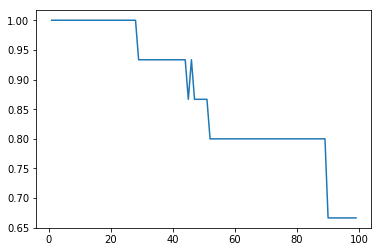

In [302]:
#%%pycodestyle
n_neighbors = range(1, 100)
scores = [0]*len(n_neighbors)
for nn in n_neighbors:
    knn = MyKNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_train, y_train)
    scores[nn-1] = knn.score(X_test, y_test)
plt.plot(n_neighbors, scores)

**MNIST**

In [158]:
mnist = fetch_mldata('MNIST original')

In [159]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [160]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [161]:
%time clf.fit(X_train, y_train)

CPU times: user 17.2 ms, sys: 149 µs, total: 17.4 ms
Wall time: 15.8 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [162]:
%time my_clf.fit(X_train, y_train)

CPU times: user 15.2 ms, sys: 3.91 ms, total: 19.1 ms
Wall time: 17 ms


In [163]:
%time clf.predict(X_test)

CPU times: user 3 s, sys: 411 ms, total: 3.41 s
Wall time: 2.12 s


array([9., 6., 2., 7., 6., 3., 6., 1., 1., 3., 7., 1., 6., 5., 1., 1., 0.,
       9., 6., 6., 4., 9., 1., 0., 3., 3., 0., 1., 8., 9., 2., 6., 1., 8.,
       0., 3., 3., 2., 6., 3., 7., 8., 7., 2., 5., 6., 4., 4., 5., 7., 0.,
       3., 6., 8., 3., 1., 8., 8., 9., 7., 2., 0., 1., 1., 8., 7., 0., 9.,
       9., 2., 4., 5., 2., 5., 1., 7., 3., 7., 3., 7., 3., 0., 3., 8., 4.,
       4., 3., 5., 9., 2., 9., 8., 6., 5., 4., 9., 7., 3., 5., 6., 9., 6.,
       3., 2., 6., 0., 2., 1., 4., 2., 0., 2., 1., 1., 0., 8., 5., 6., 6.,
       3., 7., 4., 1., 0., 3., 1., 8., 9., 6., 6., 4., 8., 6., 1., 0., 2.,
       5., 4., 8., 6., 8., 9., 0., 8., 9., 5., 9., 3., 6., 9., 1., 7., 2.,
       2., 5., 8., 5., 2., 8., 1., 8., 4., 7., 3., 1., 4., 0., 2., 6., 3.,
       1., 8., 4., 6., 9., 0., 4., 5., 4., 7., 0., 5., 7., 1., 7., 9., 0.,
       5., 8., 7., 8., 6., 8., 4., 8., 1., 2., 4., 3., 5., 5., 5., 1., 7.,
       6., 1., 1., 2., 1., 9., 5., 9., 0., 9., 2., 7., 9., 7., 2., 5., 9.,
       6., 2., 2., 6., 1.

In [164]:
%time my_clf.predict(X_test)

CPU times: user 3.73 s, sys: 406 ms, total: 4.13 s
Wall time: 2.4 s


array([9., 6., 2., 7., 6., 3., 6., 1., 1., 3., 7., 1., 6., 5., 1., 1., 0.,
       9., 6., 6., 4., 9., 1., 0., 3., 3., 0., 1., 8., 9., 2., 6., 1., 8.,
       0., 3., 3., 2., 6., 3., 7., 8., 7., 2., 5., 6., 4., 4., 5., 7., 0.,
       3., 6., 8., 3., 1., 8., 8., 9., 7., 2., 0., 1., 1., 8., 7., 0., 9.,
       9., 2., 4., 5., 2., 5., 1., 7., 3., 7., 3., 7., 3., 0., 3., 8., 4.,
       4., 3., 5., 9., 2., 9., 8., 6., 5., 4., 9., 7., 3., 5., 6., 9., 6.,
       3., 2., 6., 0., 2., 1., 4., 2., 0., 2., 1., 1., 0., 8., 5., 6., 6.,
       3., 7., 4., 1., 0., 3., 1., 8., 9., 6., 6., 4., 8., 6., 1., 0., 2.,
       5., 4., 8., 6., 8., 9., 0., 8., 9., 5., 9., 3., 6., 9., 1., 7., 2.,
       2., 5., 8., 5., 2., 8., 1., 8., 4., 7., 3., 1., 4., 0., 2., 6., 3.,
       1., 8., 4., 6., 9., 0., 4., 5., 4., 7., 0., 5., 7., 1., 7., 9., 0.,
       5., 8., 7., 8., 6., 8., 4., 8., 1., 2., 4., 3., 5., 5., 5., 1., 7.,
       6., 1., 1., 2., 1., 9., 5., 9., 0., 9., 2., 7., 9., 7., 2., 5., 9.,
       6., 2., 2., 6., 1.

In [165]:
%time clf.predict_proba(X_test)

CPU times: user 2.71 s, sys: 400 ms, total: 3.11 s
Wall time: 1.9 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [166]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.03 s, sys: 393 ms, total: 3.42 s
Wall time: 1.96 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [167]:
clf.score(X_test, y_test)

0.9728571428571429

In [168]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [245]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [246]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [247]:
%time clf.fit(X_train, y_train)

CPU times: user 38.3 s, sys: 168 ms, total: 38.5 s
Wall time: 38.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [248]:
%time my_clf.fit(X_train, y_train)

CPU times: user 37.2 s, sys: 180 ms, total: 37.4 s
Wall time: 37.3 s


In [249]:
%time clf.predict(X_test)

CPU times: user 1min 13s, sys: 20.2 ms, total: 1min 13s
Wall time: 1min 13s


array([6., 0., 2., 7., 6., 2., 6., 2., 5., 9., 8., 2., 5., 1., 6., 3., 0.,
       8., 3., 5., 7., 2., 7., 8., 0., 9., 2., 7., 2., 7., 7., 1., 3., 2.,
       2., 6., 1., 9., 2., 5., 2., 1., 3., 4., 1., 9., 5., 8., 2., 3., 7.,
       6., 1., 5., 7., 4., 0., 9., 8., 1., 5., 1., 4., 0., 2., 0., 3., 9.,
       3., 5., 5., 2., 7., 2., 1., 4., 0., 6., 1., 3., 0., 3., 4., 9., 8.,
       7., 4., 5., 6., 0., 3., 9., 6., 1., 1., 6., 1., 0., 7., 0., 4., 1.,
       0., 3., 6., 8., 4., 2., 9., 1., 4., 3., 3., 7., 5., 9., 7., 4., 6.,
       4., 8., 3., 1., 9., 1., 7., 6., 2., 1., 6., 1., 0., 7., 1., 8., 3.,
       0., 3., 5., 3., 6., 0., 2., 1., 8., 3., 3., 0., 7., 9., 2., 1., 2.,
       0., 6., 1., 1., 4., 0., 1., 1., 7., 7., 6., 4., 8., 3., 3., 8., 7.,
       6., 7., 0., 6., 9., 8., 0., 4., 7., 1., 7., 2., 0., 9., 1., 7., 3.,
       1., 9., 5., 3., 1., 4., 3., 7., 4., 4., 7., 6., 2., 5., 0., 9., 2.,
       9., 6., 7., 3., 3., 6., 0., 2., 9., 3., 6., 8., 8., 4., 9., 5., 1.,
       0., 7., 0., 8., 1.

In [250]:
%time my_clf.predict(X_test)

CPU times: user 1min 7s, sys: 81.1 ms, total: 1min 7s
Wall time: 1min 7s


array([6., 0., 2., 7., 6., 2., 6., 2., 5., 9., 8., 2., 5., 1., 6., 3., 0.,
       8., 3., 5., 7., 2., 7., 8., 0., 9., 2., 7., 2., 7., 7., 1., 3., 2.,
       2., 6., 1., 9., 2., 5., 2., 1., 3., 4., 1., 9., 5., 8., 2., 3., 7.,
       6., 1., 5., 7., 4., 0., 9., 8., 1., 5., 1., 4., 0., 2., 0., 3., 9.,
       3., 5., 5., 2., 7., 2., 1., 4., 0., 6., 1., 3., 0., 3., 4., 9., 8.,
       7., 4., 5., 6., 0., 3., 9., 6., 1., 1., 6., 1., 0., 7., 0., 4., 1.,
       0., 3., 6., 8., 4., 2., 9., 1., 4., 3., 3., 7., 5., 9., 7., 4., 6.,
       4., 8., 3., 1., 9., 1., 7., 6., 2., 1., 6., 1., 0., 7., 1., 8., 3.,
       0., 3., 5., 3., 6., 0., 2., 1., 8., 3., 3., 0., 7., 9., 2., 1., 2.,
       0., 6., 1., 1., 4., 0., 1., 1., 7., 7., 6., 4., 8., 3., 3., 8., 7.,
       6., 7., 0., 6., 9., 8., 0., 4., 7., 1., 7., 2., 0., 9., 1., 7., 3.,
       1., 9., 5., 3., 1., 4., 3., 7., 4., 4., 7., 6., 2., 5., 0., 9., 2.,
       9., 6., 7., 3., 3., 6., 0., 2., 9., 3., 6., 8., 8., 4., 9., 5., 1.,
       0., 7., 0., 8., 1.

In [251]:
%time clf.predict_proba(X_test)

CPU times: user 1min 20s, sys: 35.7 ms, total: 1min 20s
Wall time: 1min 21s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [252]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 7s, sys: 45.9 ms, total: 1min 7s
Wall time: 1min 7s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [253]:
clf.score(X_test, y_test)

0.9742857142857143

In [254]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 5

In [256]:
# seaborn
#Библиотека, которая представляет высокоуровневый интерфейс для построения статистических графиков.
# matplotlib
#Библиотека для визуализации данных двумерной и трехмерной графикой. 
# train_test_split
#Разбивает датасет на тестовую и тренировочную выборку в необходимом соотношении, предварительно перемешивает.
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
#Последовательная сцепка нескольких преобразований.
# StandardScaler (from sklearn.preprocessing import StandardScaler)
#Стандартизация фич по всем сэмплам(приведение среднего и среднеквадратичного).
# ClassifierMixin
#Наследуемый класс, содержит метод score.
# NeighborsBase
#Наследуемый класс, содержит конструктор классификаторов, методы определения алгоритма поиска соседей, обучения, предвычисления расстояний.
# KNeighborsMixin
#Наследуемый класс, содержит методы для вычисления расстояний, поиска индексов соседей, построения графов соседей.
# SupervisedIntegerMixin
#Наследуемый класс, содержит метод обучения для целых целевых меток.